# Natural Language Processing (NLP)
- Natural Language Processing (NLP) is dedicated to the interplay between computers and humans through natural language
- Its primary goal is to empower computers to comprehend, construe, and produce human language in a manner that is not only meaningful but also valuable
- NLP encompasses the use of computational methods for the examination and depiction of human language
- NLTK, or the Natural Language Toolkit, is a powerful Python library for working with human language data. To install:
  - conda install -c conda-forge nltk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Import the Natural Language Toolkit (nltk) library
import nltk

# Import specific modules from nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources required for tokenization and stop words
nltk.download('punkt')  # Downloads the Punkt tokenizer models for tokenization
nltk.download('wordnet') # Download the WordNet corpus for lemmatization
nltk.download('stopwords')  # Downloads a set of common stopwords

# Note: It's generally a good practice to download the necessary resources at the beginning of the script
# to ensure that they are available for subsequent processing steps.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anonymous\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anonymous\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anonymous\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## NLP Fundamentals

### Tokenization 

In [32]:
from nltk.tokenize import word_tokenize

# Original sentence
sentence = "After market changes, the company adapted by changing its strategy, resulting in improved performance and a changed outlook"

# Tokenize the sentence into words
tokens = word_tokenize(sentence)

In [33]:
# Display example of tokens of a text
print(sentence)
print("-" * 40)
print("Tokens:")
print(tokens)

After market changes, the company adapted by changing its strategy, resulting in improved performance and a changed outlook
----------------------------------------
Tokens:
['After', 'market', 'changes', ',', 'the', 'company', 'adapted', 'by', 'changing', 'its', 'strategy', ',', 'resulting', 'in', 'improved', 'performance', 'and', 'a', 'changed', 'outlook']


### Part-of-speech (POS) Tagging

In [34]:
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

# Tokenize the text
tokens = word_tokenize(sentence)

# Perform POS tagging
pos_tags = pos_tag(tokens)

# Display the POS tags
print(sentence)
print("-" * 40)
print("POS Tags:")
print(pos_tags)

After market changes, the company adapted by changing its strategy, resulting in improved performance and a changed outlook
----------------------------------------
POS Tags:
[('After', 'IN'), ('market', 'NN'), ('changes', 'NNS'), (',', ','), ('the', 'DT'), ('company', 'NN'), ('adapted', 'VBN'), ('by', 'IN'), ('changing', 'VBG'), ('its', 'PRP$'), ('strategy', 'NN'), (',', ','), ('resulting', 'VBG'), ('in', 'IN'), ('improved', 'JJ'), ('performance', 'NN'), ('and', 'CC'), ('a', 'DT'), ('changed', 'VBN'), ('outlook', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anonymous\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Stemming and Lemmatization

In [22]:
# Import thenecessary libraries from the nltk.stem module
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Create an instance of the PorterStemmer class
stemmer = PorterStemmer()

# Initialize a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Tokenize the sentence into words using word_tokenize
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

# Perform stemming for each word in the sentence
stemmed = [stemmer.stem(token) for token in tokens]

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    return {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}.get(tag, wordnet.NOUN)

# Lemmatize each word in the sentence
lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

# Display the stemming
print(sentence)
print("-" * 40)
print("Stemmed:")
print(" ".join(stemmed))
print("-" * 40)
print("Stemmed:")
print(" ".join(lemmatized))

After market changes, the company adapted by changing its strategy, resulting in improved performance and a changed outlook
----------------------------------------
Stemmed:
after market chang , the compani adapt by chang it strategi , result in improv perform and a chang outlook
----------------------------------------
Stemmed:
After market change , the company adapt by change it strategy , result in improve performance and a change outlook


### Remove stop words

In [36]:
from nltk.corpus import stopwords

# Retrieve the set of English stopwords from the NLTK corpus
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokens
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

In [37]:
# Display example of filtered_tokens of a text
print(sentence)
print("-" * 40)
print("Filtered Tokens (Removed stop words):")
print(filtered_tokens)

After market changes, the company adapted by changing its strategy, resulting in improved performance and a changed outlook
----------------------------------------
Filtered Tokens (Removed stop words):
['market', 'changes', ',', 'company', 'adapted', 'changing', 'strategy', ',', 'resulting', 'improved', 'performance', 'changed', 'outlook']


### N-Grams

In [38]:
# Import the necessary module for n-gram generation from NLTK
from nltk.util import ngrams

# Tokenize the text using NLTK's word_tokenize function
tokens = word_tokenize(sentence)

# Function to generate n-grams
def generate_ngrams(tokens, n):
    # Use the ngrams function from NLTK to generate n-grams from the tokenized list of words
    ngrams_list = list(ngrams(tokens, n))
    return ngrams_list

# Choose the value of n for n-grams (in this case, trigrams)
n = 3

# Generate and print n-grams for the sample text
print(sentence)
print("-" * 40)
result_ngrams = generate_ngrams(tokens, n)
print(f"{n}-grams: {result_ngrams}")

After market changes, the company adapted by changing its strategy, resulting in improved performance and a changed outlook
----------------------------------------
3-grams: [('After', 'market', 'changes'), ('market', 'changes', ','), ('changes', ',', 'the'), (',', 'the', 'company'), ('the', 'company', 'adapted'), ('company', 'adapted', 'by'), ('adapted', 'by', 'changing'), ('by', 'changing', 'its'), ('changing', 'its', 'strategy'), ('its', 'strategy', ','), ('strategy', ',', 'resulting'), (',', 'resulting', 'in'), ('resulting', 'in', 'improved'), ('in', 'improved', 'performance'), ('improved', 'performance', 'and'), ('performance', 'and', 'a'), ('and', 'a', 'changed'), ('a', 'changed', 'outlook')]


### Named Entity Recognition (NER)

In [26]:
# conda install -c conda-forge spacy
import spacy

# Download and install the spaCy model
spacy.cli.download('en_core_web_sm')

# Load spaCy NER model
nlp = spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [45]:
# Extract Named Entities using spaCy

ne_sentence = "After winning the Nobel Prize, Dr. Emily Johnson, from Stanford University, will deliver a keynote speech at the conference in Silicon Valley on December 10th, 2024"

# Process the sample text using spaCy's natural language processing pipeline
doc_ner = nlp(ne_sentence)

# Extract named entities and their corresponding entity labels from the processed document
# - 'ent.text' retrieves the text of the named entity
# - 'ent.label_' retrieves the entity label (e.g., 'PERSON', 'ORG', 'GPE') assigned by spaCy
entities_ner = [(ent.text, ent.label_) for ent in doc_ner.ents]

# Print the extracted named entities and their labels
print(ne_sentence)
print("-" * 40)
print(entities_ner)

After winning the Nobel Prize, Dr. Emily Johnson, from Stanford University, will deliver a keynote speech at the conference in Silicon Valley on December 10th, 2024
----------------------------------------
[('the Nobel Prize', 'WORK_OF_ART'), ('Emily Johnson', 'PERSON'), ('Stanford University', 'ORG'), ('Silicon Valley', 'LOC'), ('December 10th, 2024', 'DATE')]


### Sentiment Analysis 

In [28]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anonymous\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [46]:
# Sample text for sentiment analysis
sa_sentence = "I love this product! It's amazing"

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Get the sentiment scores for the sample text
sentiment_scores = sia.polarity_scores(sa_sentence)

# Determine the sentiment based on the compound score
if sentiment_scores['compound'] >= 0.05:
    sentiment = 'Positive'
elif sentiment_scores['compound'] <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

# Print the sentiment and sentiment scores
print(f"Sentiment: {sentiment}")
print(f"Sentiment Scores: {sentiment_scores}")

Sentiment: Positive
Sentiment Scores: {'neg': 0.0, 'neu': 0.266, 'pos': 0.734, 'compound': 0.8516}


## 

In [3]:
# Import necessary modules from scikit-learn
from sklearn.datasets import fetch_20newsgroups

# Load the 20 newsgroups dataset using the fetch_20newsgroups function
# The 'subset' parameter is set to 'all', indicating that all available newsgroups categories will be included
# This dataset is a collection of approximately 20,000 newsgroup documents across 20 different newsgroups or categories.
newsgroups = fetch_20newsgroups(subset='all')

# The variable 'newsgroups' now holds the dataset, which includes the textual content of documents and their corresponding categories.
# It's common to use this dataset for text classification and natural language processing tasks.

In [4]:
# Create a DataFrame 'df' using the newsgroups dataset
# 'newsgroups.data' contains the textual content of the documents, and 'newsgroups.target' contains their corresponding categories.
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

# Randomly sample 2000 rows from the DataFrame for a subset analysis
# The 'n' parameter specifies the number of rows to be sampled, and 'random_state=42' ensures reproducibility.
df = df.sample(n=2000, random_state=42)

# Reset the index of the DataFrame after sampling to ensure continuous and unique indices
df = df.reset_index(drop=True)

# Display the DataFrame to observe the sampled subset
df

# The DataFrame 'df' now contains a subset of 2000 rows randomly sampled from the original newsgroups dataset.
# This sampled subset can be used for various analyses or model training on a smaller scale.

,text,target
0,From: shippert@cco.caltech.edu (Tim Shippert)\...,9
1,From: mont@netcom.com (Mont Pierce)\nSubject: ...,12
2,From: Amruth Laxman <al26+@andrew.cmu.edu>\nSu...,14
3,From: kbanaian@bernard.pitzer.claremont.edu (K...,18
4,From: mcelwre@cnsvax.uwec.edu\nSubject: FREE-E...,0
...,...,...
1995,From: gp2011@andy.bgsu.edu (George Pavlic)\nSu...,10
1996,From: Robert Everett Brunskill <rb6t+@andrew.c...,4
1997,From: luriem@alleg.edu(Michael Lurie) The Libe...,9
1998,From: romdas@uclink.berkeley.edu (Ella I Baff)...,13


In [5]:
# Display the textual content of the first document in the DataFrame
print(df.iloc[0, 0])

# Print a separator line for clarity in the output
print("-" * 40)

# Display the target category and its label for the first document in the DataFrame
# 'df.iloc[0, 1]' retrieves the target value, 
#   and 'newsgroups.target_names[df.iloc[0, 1]]' maps the target to its corresponding category name
print("Target:", df.iloc[0, 1], "(", newsgroups.target_names[df.iloc[0, 1]], ")")

From: shippert@cco.caltech.edu (Tim Shippert)
Subject: Re: Infield Fly Rule
Organization: California Institute of Technology, Pasadena
Lines: 25
NNTP-Posting-Host: sandman.caltech.edu

jrogoff@scott.skidmore.edu (jay rogoff) writes:

>One last infield fly question that has always puzzled me and hasn't
>yet been addressed.  I believe the rule also does *not* deal with this
>situation:

>However, if the Infield Fly is *not* caught, at what point can a runner
>legally leave his base w/o fear of being doubled off for advancing too
>early?  

	The runner can leave his base at any time.  If the ball is caught,
he's got to tag up.  If it isn't caught, he _doesn't_ have to tag up at
all.  So, if he's feeling lucky, your runner at second can sprint for glory
as soon as the ball is popped up.  If it isn't caught, he's probably scored
a run.  If it is, he's probably headed for AAA.  

	The only effect the infield fly has is to make the batter out,
thereby removing the force on the runners on base

In [6]:
# Determine the shape or dimensions of the Pandas DataFrame df
df.shape

(2000, 2)

In [7]:
# Display target names and their meanings
target_names = newsgroups.target_names
print("Target Names:")
for i, name in enumerate(target_names):
    print(f"Target {i}: {name}")

Target Names:
Target 0: alt.atheism
Target 1: comp.graphics
Target 2: comp.os.ms-windows.misc
Target 3: comp.sys.ibm.pc.hardware
Target 4: comp.sys.mac.hardware
Target 5: comp.windows.x
Target 6: misc.forsale
Target 7: rec.autos
Target 8: rec.motorcycles
Target 9: rec.sport.baseball
Target 10: rec.sport.hockey
Target 11: sci.crypt
Target 12: sci.electronics
Target 13: sci.med
Target 14: sci.space
Target 15: soc.religion.christian
Target 16: talk.politics.guns
Target 17: talk.politics.mideast
Target 18: talk.politics.misc
Target 19: talk.religion.misc


In [8]:
# Explore dataset statistics
print("Number of documents:", len(df))
print("Number of classes:", df['target'].nunique())
print("Unique Target Values:", df['target'].unique())

Number of documents: 2000
Number of classes: 20
Unique Target Values: [ 9 12 14 18  0 15  5  6  1  3 10  8  2 16 19 17 11  4 13  7]


In [9]:
# Retrieve and display the column names of the Pandas DataFrame df
print(df.columns)

Index(['text', 'target'], dtype='object')


In [10]:
# Obtain a concise summary of the information about the Pandas DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   target  2000 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 23.6+ KB


## Visualization

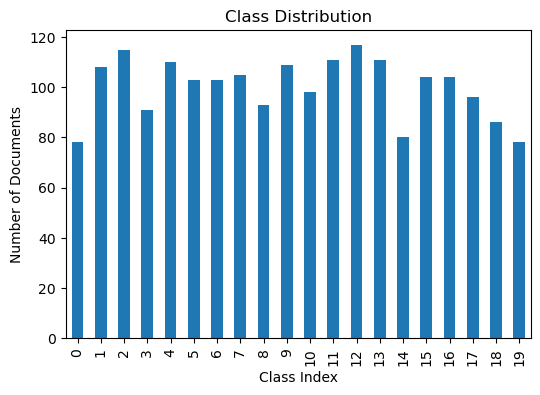

In [11]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
df['target'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class Index')
plt.ylabel('Number of Documents')
plt.show()

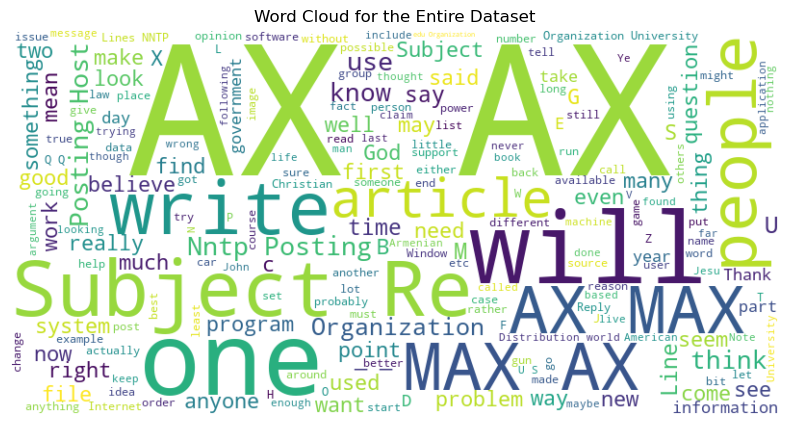

In [12]:
# Word Cloud for Bag-of-Words (BoW)
# conda install -c conda-forge wordcloud
from wordcloud import WordCloud

# Word Cloud for the entire dataset
text_full_dataset = ' '.join(df['text'])
wordcloud_full_dataset = WordCloud(width=800, height=400, background_color='white').generate(text_full_dataset)

# Display the word cloud for the entire dataset
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_full_dataset, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for the Entire Dataset')
plt.show()

## Modelling

### Classifier

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

#### Bag of Words (BoW)

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

In [16]:
# Create a CountVectorizer instance to convert text data into a bag-of-words representation
vectorizer = CountVectorizer()

# Transform the training data (X_train) and testing data (X_test) into bag-of-words vectors
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes model instance
model = MultinomialNB()

# Train the model using the bag-of-words vectors of the training data and corresponding target labels
model.fit(X_train_vec, y_train)

# Make predictions on the testing data using the trained model
y_pred = model.predict(X_test_vec)

# Print a classification report providing precision, recall, and F1-score for each class
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.29      0.79      0.42        19
           2       1.00      0.68      0.81        25
           3       0.85      0.50      0.63        22
           4       0.67      0.55      0.60        22
           5       1.00      0.32      0.48        25
           6       1.00      0.30      0.46        20
           7       0.83      0.25      0.38        20
           8       1.00      0.57      0.73        14
           9       0.94      0.68      0.79        22
          10       0.93      0.76      0.84        17
          11       0.63      0.92      0.75        24
          12       0.69      0.41      0.51        22
          13       0.71      0.68      0.70        22
          14       0.67      0.20      0.31        10
          15       0.45      0.86      0.59        22
          16       0.58      0.90      0.71        20
    

#### Improve the performance

In [17]:
# Create a CountVectorizer instance with specified parameters for feature extraction
#  'ngram_range=(1, 2)' considers both unigrams and bigrams for feature representation
#  'stop_words="english"' removes common English stop words during the vectorization process
vectorizer_filtered = CountVectorizer(ngram_range=(1, 2), stop_words="english")

# Transform the training data (X_train) and testing data (X_test) into bag-of-words vectors
# using the specified CountVectorizer instance with n-gram range and stop words applied
X_train_vec_filtered = vectorizer_filtered.fit_transform(X_train)
X_test_vec_filtered = vectorizer_filtered.transform(X_test)

In [18]:
# Create a Multinomial Naive Bayes model instance for optimized feature representation
model_opt = MultinomialNB()

# Train the Multinomial Naive Bayes model using the bag-of-words vectors of the filtered training data
# (where n-grams are considered, and common English stop words are removed)
model_opt.fit(X_train_vec_filtered, y_train)

# Make predictions on the filtered testing data using the trained Multinomial Naive Bayes model
y_pred_opt = model_opt.predict(X_test_vec_filtered)

# Print a classification report providing precision, recall, and F1-score for each class
print("Classification Report:")
print(classification_report(y_test, y_pred_opt))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.30      0.84      0.44        19
           2       0.86      0.72      0.78        25
           3       0.80      0.55      0.65        22
           4       0.75      0.68      0.71        22
           5       1.00      0.48      0.65        25
           6       0.83      0.50      0.62        20
           7       0.92      0.60      0.73        20
           8       1.00      0.71      0.83        14
           9       0.95      0.86      0.90        22
          10       0.89      0.94      0.91        17
          11       0.68      0.88      0.76        24
          12       0.68      0.59      0.63        22
          13       0.85      0.77      0.81        22
          14       0.86      0.60      0.71        10
          15       0.79      0.86      0.83        22
          16       0.53      1.00      0.69        20
    